# Шаг 1. Загрузка необходимых библиотек и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('gym_churn.csv')

Посмотрим описание данных 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Выведем описание данных по каждому столбцу.

In [4]:
data.describe(percentiles = [0.05, 0.95]).round(2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.00,4000.00,4000.00,4000.00,4000.0,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.51,0.85,0.49,0.31,0.9,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.3,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.0,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
5%,0.00,0.00,0.00,0.00,0.0,1.00,0.00,24.00,12.55,1.00,0.00,0.29,0.03,0.00
50%,1.00,1.00,0.00,0.00,1.0,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
95%,1.00,1.00,1.00,1.00,1.0,12.00,1.00,34.00,323.44,12.00,11.00,3.54,3.55,1.00
max,1.00,1.00,1.00,1.00,1.0,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


**ВЫВОД:**
1. пропусков нет

2. Данные в колонках "gender", "Near_Location", "Partner", "Promo_friends", "Phone", "Group_visits"  - категориальные данные  Они уже переведены в числовые со значениями 0 и 1. С этими данными все в порядке.

3. Данные в колонках "Contract_period", "Age", "Month_to_end_contract", "Lifetime"- должны иметь целочисленные значения. Возраст находится в диапазоне от 18-41, период от 1 до 12, срок окончания абонемента от 1 до 12 а время от 0 до 31.  С данными все впорядке, только "Month_to_end_contract", "Lifetime" надо перевести в целочисленные значения.

4. Данные в колонке "Avg_additional_charges_total", - явно имеют выбросы. Максимальное значение 552, при том что 95% значений укладываются в 323. Нужно посмотреть на выбросы.

5. Данные в колонке "Avg_class_frequency_total", "Avg_class_frequency_current_month" — явно имеют выбросы. Максимальное значение 6, при том что 95% значений укладываются в 3. Нужно посмотреть на выбросы. 


Приведем данные к нужному типу и округлим.

In [5]:
data['Lifetime'] = data['Lifetime'].astype('int64')
data['Month_to_end_contract'] = data['Month_to_end_contract'].astype('int64')
data['Avg_additional_charges_total'] = data['Avg_additional_charges_total'].astype('int64')

data['Avg_class_frequency_total'] = data['Avg_class_frequency_total'].round(2)
data['Avg_class_frequency_current_month'] = data['Avg_class_frequency_current_month'].round(1)

Посмотрим поподробнее на данные с выбросами "Avg_additional_charges_total" и "Avg_class_frequency_total", "Avg_class_frequency_current_month", "Lifetime". Построим боксплоты

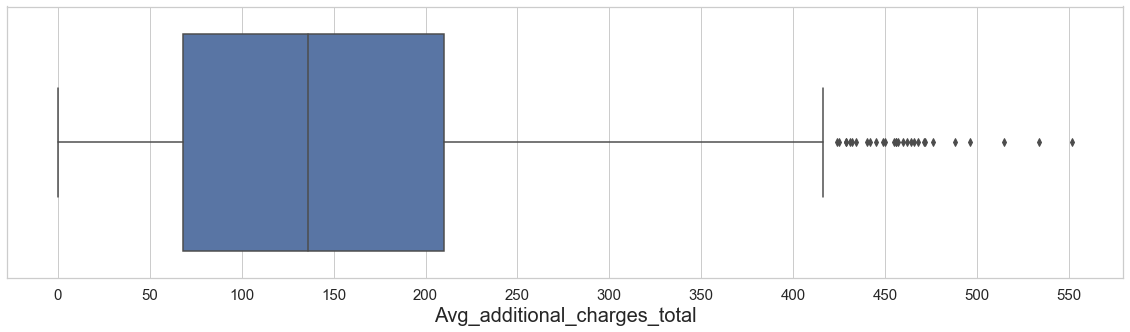

In [6]:
sns.set(style='whitegrid', rc={'figure.figsize':(20,5)})

ax = sns.boxplot(x =data['Avg_additional_charges_total'], orient="h")

ax.set_xlabel('Avg_additional_charges_total', fontsize = 20)
ax.tick_params(axis = 'x', labelsize = 15) 
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))

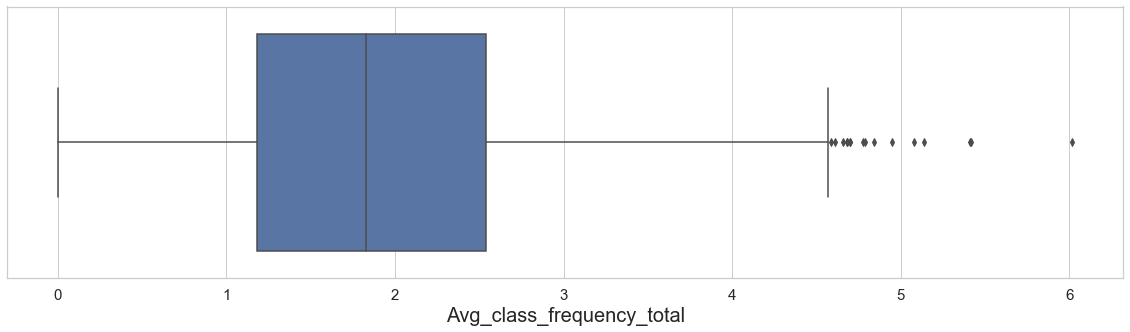

In [7]:
ax = sns.boxplot(x =data['Avg_class_frequency_total'], orient="h")
ax.set_xlabel('Avg_class_frequency_total', fontsize = 20)
ax.tick_params(axis = 'x', labelsize = 15)

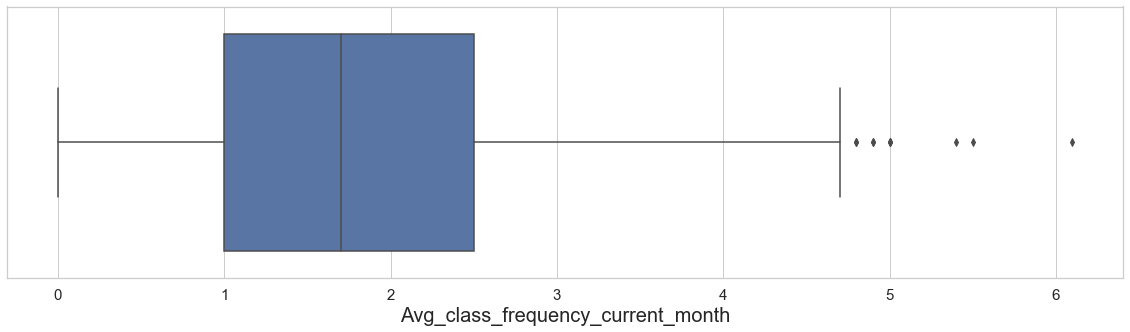

In [8]:
ax = sns.boxplot(x =data['Avg_class_frequency_current_month'], orient="h")
ax.set_xlabel('Avg_class_frequency_current_month', fontsize = 20)
ax.tick_params(axis = 'x', labelsize = 15)

Удалим данные с выбросами из колонок 'Avg_additional_charges_total', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Lifetime'

In [9]:
filter = '''Avg_additional_charges_total < 324 and Avg_class_frequency_total < 3.5 and Avg_class_frequency_current_month < 3.5 and Lifetime < 11'''
       
data_clear = data.query(filter)

In [10]:
"Процент оставшихся данных: {0:.2f}".format (len(data_clear ) / len(data))

'Процент оставшихся данных: 0.84'

Немного укоротим названия столбцов для удобства.

In [11]:
data_clear.columns = ['gender','Near_Location', 'Partner', 'Promo_friends', 'Phone','Contract_period', 'Group_visits', 'Age',
                      'Charges_total', 'Month_to_end', 'Lifetime', 'Visits_total', 'Visits_last_mounth', 'Churn']

**ВЫВОД:** 
Подготовили данные к анализу, убрали выбросы, привели данные к правильному типу, округлили, изменили названия столбцов. Удаленные данные составили 16%

# Шаг 2. Исследовательский анализ данных (EDA)

## 2.1 Средние значения признаков

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [12]:
data_clear_mean = data_clear.groupby('Churn').mean().round(3).T
data_clear_mean

Churn,0,1
gender,0.505,0.512
Near_Location,0.871,0.767
Partner,0.538,0.356
Promo_friends,0.358,0.182
Phone,0.905,0.902
Contract_period,5.718,1.729
Group_visits,0.458,0.271
Age,29.979,26.988
Charges_total,142.102,112.819
Month_to_end,5.268,1.664


**ВЫВОД:**
Бросается в глаза что в СРЕДНЕМ потерянные клиенты:
- это клиенты имеющие абонемент на короткий период
- это те кто прозанимались меньше месяца (видимо сразу что-то не понравилось)
- те у кого заканчивается абонимент 

И наоборот, остающиеся клиенты это как правило те:
- имеющие длительный абонимент
- уже относительно долгое время занимающиеся в клубе
- у кого до срока окончания абонимента еще далеко.
- также они ходят в неделю чуть чаще 

Еще потерянные клиенты в последний месяц ходят реже. А клиенты пришедшие от партнеров клуба а также по приглашению друзей как правило чаще остаются.

## 2.2 Cтолбчатые гистограммы и распределения признаков

Построим столбчатые графики для категориальных данных. с разделением на группы  — тех, кто ушел в отток и тех, кто остался

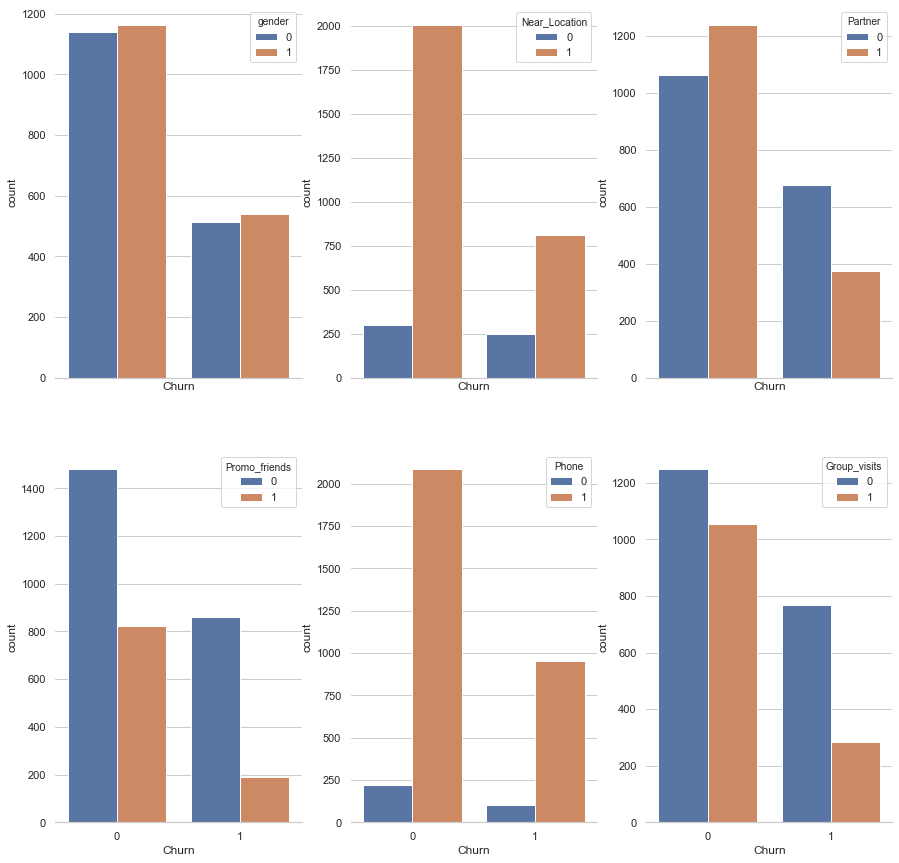

In [13]:
f, axes = plt.subplots(2, 3, figsize=(15, 15), sharex=True)
sns.despine(left=True)

sns.countplot(x='Churn', hue="gender", data=data_clear, ax=axes[0, 0])
sns.countplot(x='Churn', hue="Near_Location", data=data_clear, ax=axes[0, 1])
sns.countplot(x='Churn', hue="Partner", data=data_clear, ax=axes[0, 2])
sns.countplot(x='Churn', hue="Promo_friends", data=data_clear, ax=axes[1, 0])
sns.countplot(x='Churn', hue="Phone", data=data_clear, ax=axes[1, 1])
sns.countplot(x='Churn', hue="Group_visits", data=data_clear, ax=axes[1, 2])

plt.show()

Построим графики распределения для дискретных численных данных

<Figure size 1440x360 with 0 Axes>

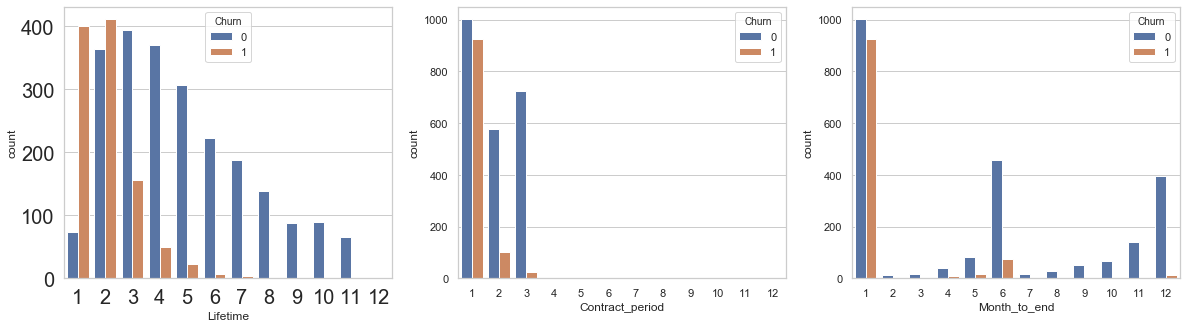

In [14]:
sns.despine(left=True)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

sns.countplot(x='Lifetime', hue="Churn", data=data_clear, ax=ax1)
sns.countplot(x='Contract_period', hue="Churn", data=data_clear, ax=ax2)
sns.countplot(x='Month_to_end', hue="Churn", data=data_clear, ax=ax3)

ax1.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.show()

Построим распределения для непрерывных численных данных

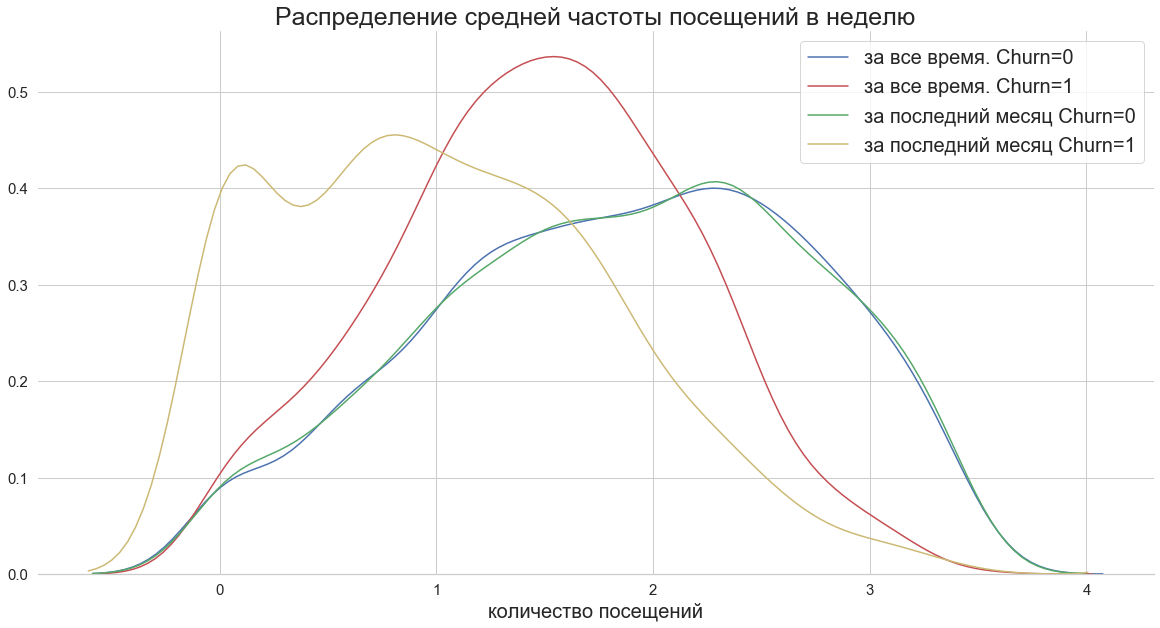

In [15]:
sns.set(style='whitegrid', rc={'figure.figsize':(20,10)})
ax = sns.distplot(data_clear.query(' Churn==0 ')['Visits_total'],
                 hist=False, color="b", label="за все время. Churn=0")
ax = sns.distplot(data_clear.query(' Churn==1 ')['Visits_total'],
                 hist=False, color="r", label="за все время. Churn=1")
ax = sns.distplot(data_clear.query(' Churn==0 ')['Visits_last_mounth'],
                 hist=False, color="g", label="за последний месяц Churn=0")
ax = sns.distplot(data_clear.query(' Churn==1 ')['Visits_last_mounth'],
                 hist=False, color="y", label="за последний месяц Churn=1")
sns.despine(left=True)
sns.despine(left=True)

ax.set_title('Распределение средней частоты посещений в неделю', fontsize = 25)
ax.set_xlabel('количество посещений', fontsize = 20)
ax.set_ylabel('')

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

ax.legend(fontsize = 20)   

## Комментарий наставника
<span style="color:green">Прекрасные графики, молодец!</span>

## 2.3 Матрица корреляций

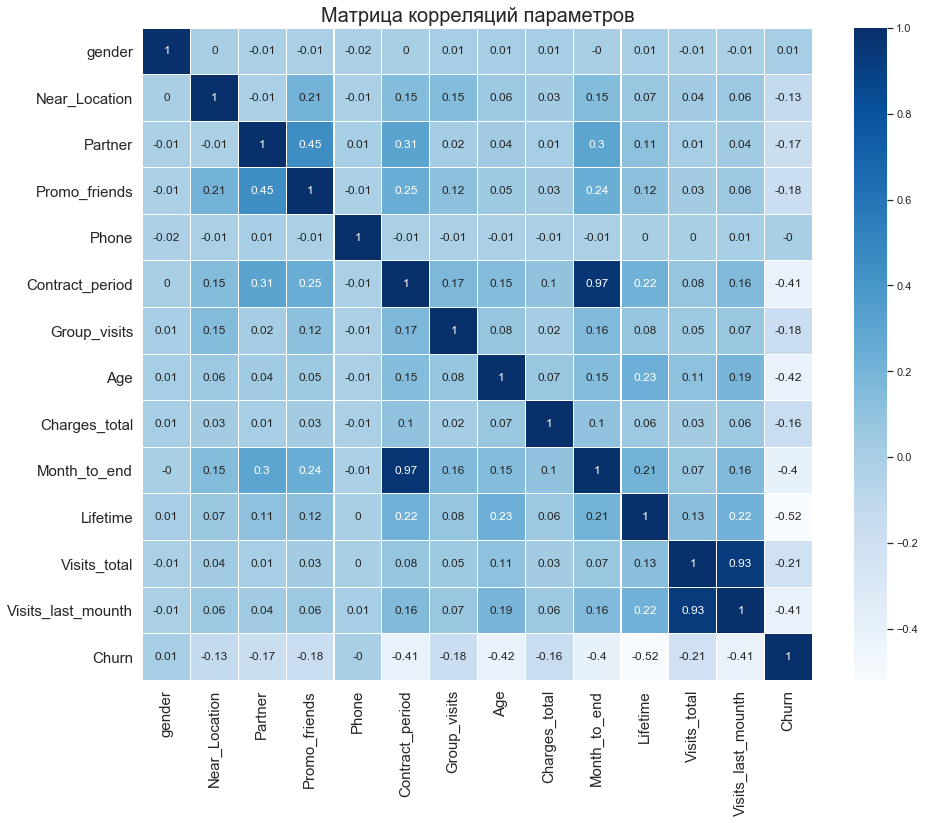

In [16]:
sns.set(style='whitegrid', rc={'figure.figsize':(15,12)})
ax = sns.heatmap(data_clear.corr().round(2), annot=True,  linewidths=.1, cmap="Blues")
ax.set_title('Матрица корреляций параметров', fontsize = 20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

**ОБЩИЙ ВЫВОД:**

Бросается в глаза что в СРЕДНЕМ потерянные клиенты:
- это клиенты как правило имеющие абонемент на короткий период, или те у кого заканчивается абонимент (остался последний месяц)
- это клиенты которые прозанимались короткое время, видимо сразу что-то не понравилось. В среднем это 1.5 месяца.



И наоборот, СРЕДНЕМ остающиеся клиенты:
- имеет длительный абонимент
- относительно долгое время занимаются в клубе
- имеют абонимент срок окончания которого еще далеко.
- кто ходят чаще в неделю чем те кто бросают.
- кто чаще ходят на групповые занятия.

Еще потерянные клиенты в последний месяц ходят реже особенно в последний месяц. А клиенты пришедшие от партнеров клуба а также по приглашению друзей как правило чаще остаются.(хотя разница небольшая)


Что касается зависимости оттока от характеристик то:

- пол, и наличие телефона в анкете,  практически никак не коррелируют с оттоком.
- также слабая корреляция оттока от района, - что неожиданно


Корреляция между признаками:
 - очень сильная корреляция между длительностью абонемента и количеством месяцев до окончания абонемента.
 - очень сильная корреляция между средними посещениями за весь период и за последний месяц. Что логично. Посещаемость у тех кто занимается не должна падать, только снижается посещаемость у тех кто бросает клуб.
 - небольшая корреляция между теми кто пришел по акции и тех кто пришел от партнера клуба. Не очень понятно почему.

# Шаг 3. Модель прогнозирования оттока пользователей

Удалим парметры не влияющие на интересующую нас метрику. Это параметры 'gender', 'Phone'

In [17]:
model_data = data_clear.drop(['gender', 'Phone'], axis = 1)

Разобьем данные на обучающую и валидационную выборку функцией

In [18]:
X = model_data.drop('Churn', axis = 1)
y = model_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Стандартизируем выборку ввиду больших различий по числам в данных.

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Создадим и обучим две модели LogisticRegression() и RandomForestClassifier() на train-выборке

In [20]:
model_regression = LogisticRegression()
model_forest = RandomForestClassifier(n_estimators = 100)

In [21]:
model_regression = model_regression.fit(X_train_st, y_train)
model_forest = model_forest.fit(X_train_st, y_train)

Провалидируем и сравним полученные модели между собой по метрикам accuracy, precision и recall

In [22]:
predictions_model_regression = model_regression.predict(X_test_st)
predictions_model_forest = model_forest.predict(X_test_st)

In [23]:
data_results_score = [
    ['Accuracy', accuracy_score(y_test, predictions_model_regression), accuracy_score(y_test, predictions_model_forest)],
    ['Precision', precision_score(y_test, predictions_model_regression),precision_score(y_test, predictions_model_forest)],
    ['Recall', recall_score(y_test, predictions_model_regression),recall_score(y_test, predictions_model_regression)],
    ]
results_score = pd.DataFrame(data_results_score, columns = ['metric', 'LogisticRegression','RandomForestClassifier'])
results_score.round(3)

,metric,LogisticRegression,RandomForestClassifier
0,Accuracy,0.911,0.899
1,Precision,0.837,0.821
2,Recall,0.871,0.871


**ВЫВОД:**

Ввиду того что клиентов попавших в отток гораздо меньше чем тех кто остался, метрика accuracy не столь показательна. 
В целом модель линейной регрессии оказалась лучше, т.к. она лучше чуть лучше по метрике Precision. Она чуть точнее угадывает клиентов уходящих в отток (что нам и надо.Churn=1)

# Шаг 4. Кластеризация пользователей

## 4.1 Агломеративная иерархическая кластеризация

Стандартизируем данные. Опять же посмотрим на два варианта данных, полные данные и данные где удалены такие параметры как телефон и пол. Ведь задача кластеризации разделить на группы с минимальным и максимальным оттоком, а телефон и пол на отток не влияют.

In [24]:
data_claster = data_clear.drop('Churn', axis = 1)
X_scaler = scaler.fit_transform(data_claster)

In [25]:
data_claster_alternative = data_clear.drop(['gender', 'Phone', 'Churn'], axis = 1)
X_scaler_alternative = scaler.fit_transform(data_claster_alternative)

Построим матрицы расстояний функцией linkage() на стандартизованных матрицах признаков и нарисуем дендрограммы для обоих вариантов

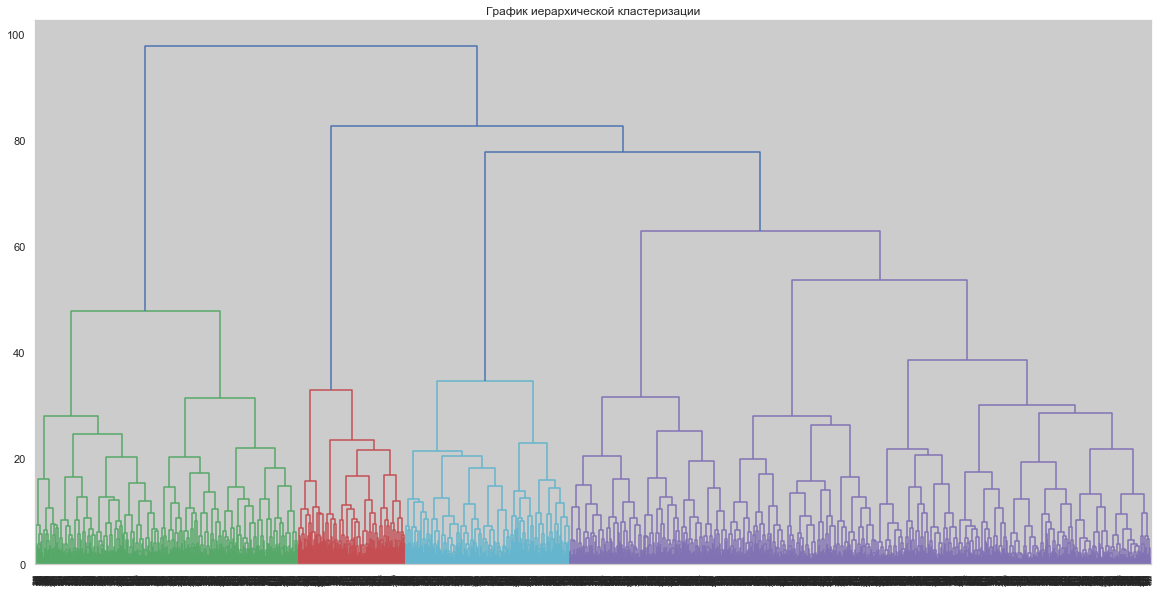

In [26]:
linked = linkage(X_scaler, method = 'ward')
plt.figure(figsize=(20, 10))  
dendrogram(linked, orientation='top')
plt.title('График иерархической кластеризации')
plt.show()

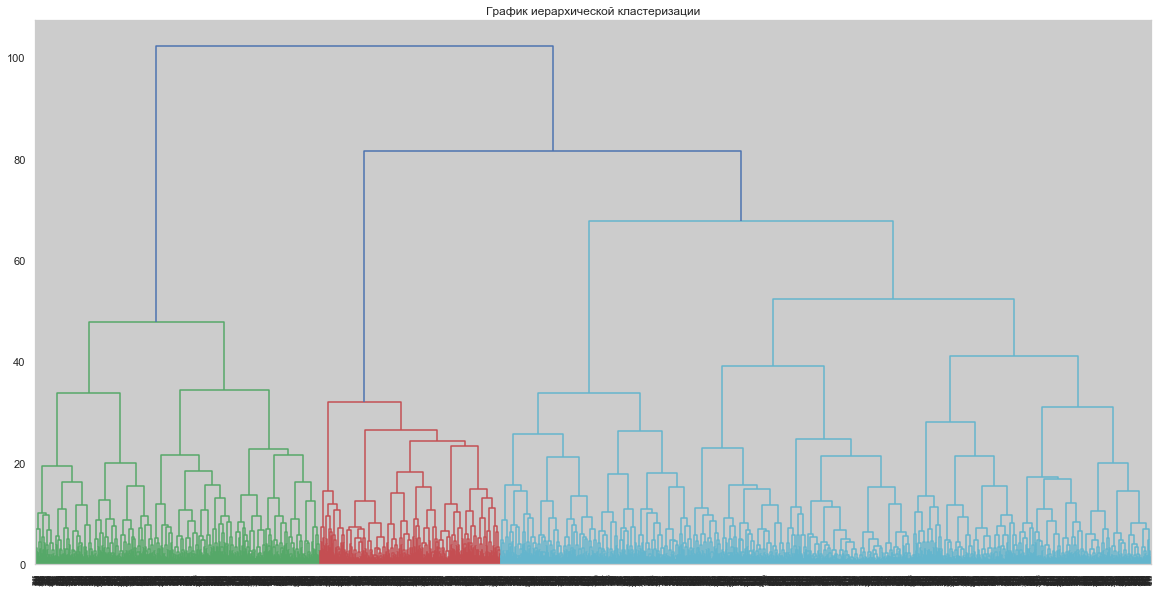

In [27]:
linked_alternative = linkage(X_scaler_alternative, method = 'ward')
plt.figure(figsize=(20, 10))  
dendrogram(linked_alternative, orientation='top')
plt.title('График иерархической кластеризации')
plt.show()

В первом случае получили разделение на четыре группы во втором случае получили разделение на три группы.

## 4.2 Кластеризации на основании алгоритма K-Means

Применим алгоритм кластеризации K-Means. Опять же, на основе предыдущей кластеризации создадим два варианта. Вариант первый - деление на 4 группы. Вариант второй - деление на три группы.

In [28]:
km = KMeans(n_clusters = 4, random_state = 0) 
labels = km.fit_predict(X_scaler) 

In [29]:
km_alternative = KMeans(n_clusters = 3, random_state = 0) 
labels_alternative = km_alternative.fit_predict(X_scaler_alternative) 

## 4.3 Средние значения признаков для кластеров. 

Добавим столбец с метками кластеров в таблицы с данными.

In [30]:
data_clasters = data_clear.copy()
data_clasters['claster'] = labels

In [31]:
data_clasters_alternative = data_clear.copy()
data_clasters_alternative['claster_alternative'] = labels_alternative

In [32]:
data_clasters.groupby('claster').mean().round(3).T

claster,0,1,2,3
gender,0.534,0.522,0.493,0.501
Near_Location,0.851,0.847,0.755,0.941
Partner,0.469,0.353,0.368,0.787
Promo_friends,0.311,0.195,0.189,0.580
Phone,0.000,1.000,1.000,0.999
Contract_period,4.559,2.185,1.888,10.613
Group_visits,0.410,0.403,0.299,0.533
Age,29.158,29.734,27.868,29.871
Charges_total,133.925,139.378,119.692,143.912
Month_to_end,4.258,2.051,1.800,9.714


In [33]:
data_clasters_alternative.groupby('claster_alternative').mean().round(3).T

claster_alternative,0,1,2
gender,0.502,0.510,0.512
Near_Location,0.756,0.943,0.846
Partner,0.376,0.786,0.338
Promo_friends,0.188,0.575,0.200
Phone,0.911,0.897,0.901
Contract_period,1.894,10.572,2.162
Group_visits,0.307,0.535,0.391
Age,27.868,29.872,29.726
Charges_total,118.204,144.409,140.573
Month_to_end,1.807,9.686,2.032


In [34]:
print(data_clasters['claster'].value_counts() )
print(data_clasters_alternative['claster_alternative'].value_counts())

2    1211
1     963
3     861
0     322
Name: claster, dtype: int64
0    1314
2    1081
1     962
Name: claster_alternative, dtype: int64


**ВЫВОД:** 

Деление на три группы кажется более оптимальным чем на четыре. Т.к если рассматривать качество разделения по ключевому показателю - **Churn**, то нам важны две крайние группы где лучший и худший показатель соответственно, чтобы отсортировать клиентов на надежных и не надежных. Имея схожие показатели для групп с надежными клиентами (**Churn** = 4%) и ненадежными клиентами (**Churn** = 62%) в обоих вариантах кластеризации, количество клиентов в этих группах, в варианте кластеризации на три группы выше чем для кластеризации на четыре группы. Т.е во втором варианте имеем большую выборку как надежных так и ненадежных клиентов.

Для дальнейшего анализа возьмем кластеризацию на три группы.


**ПРЕДВАРИТЕЛЬНЫЕ ВЫВОДЫ ПО ТАБЛИЦЕ СРЕДНИХ ЗНАЧЕНИЙ ПОКАЗАТЕЛЕЙ ТРЕХ ГРУПП:**
- Выделяется первая группа. Она  лидирует по количеству клиентов- партнеров клуба, также в этой группе много клиентов пришедших по акции, средняя длительность абонемента в ней самая большая. Клиенты этой группы чаще остальных ходят в клуб. Только 4% клиентов из этой группы бросают заниматься в клубе.

- Также выделяется нулевая группа. Но результат у нее обратный. 60% клиентов из данной группы бросают ходить в клуб. Остальные показатели тоже одни из самых низких.

## 4.4 Cтолбчатые гистограммы и распределения признаков

Построим столбчатые графики для категориальных данных. с разделением на группы кластеризации.

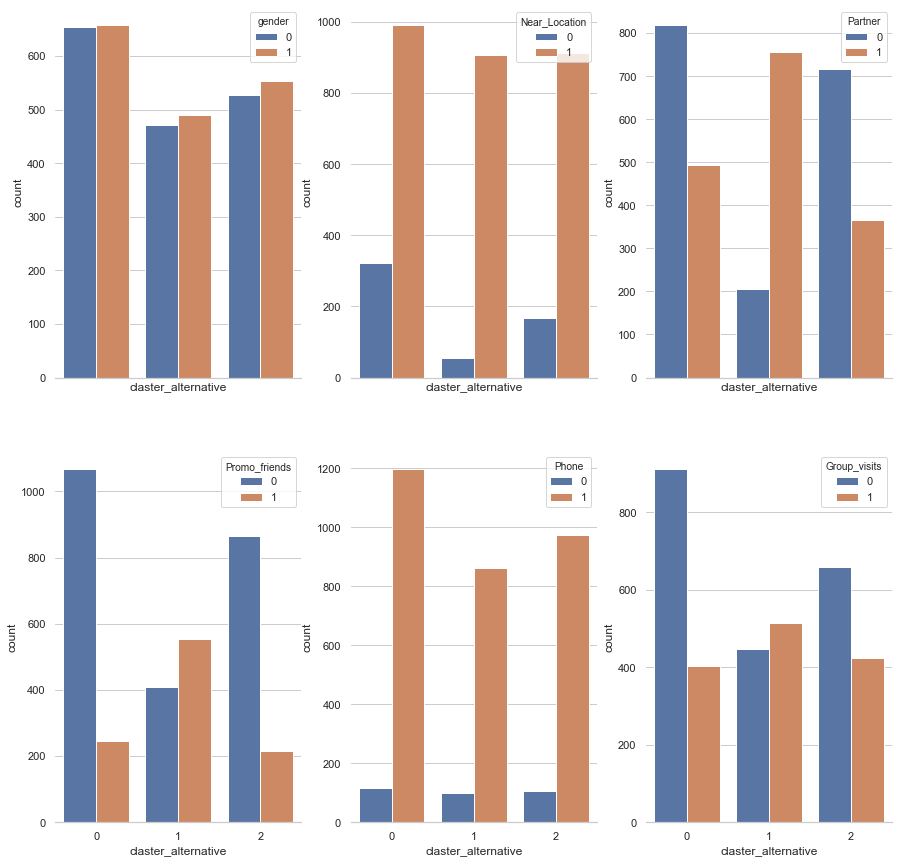

In [35]:
f, axes = plt.subplots(2, 3, figsize=(15, 15), sharex=True)
sns.despine(left=True)

sns.countplot(x='claster_alternative', hue="gender", data=data_clasters_alternative, ax=axes[0, 0])
sns.countplot(x='claster_alternative', hue="Near_Location", data=data_clasters_alternative, ax=axes[0, 1])
sns.countplot(x='claster_alternative', hue="Partner", data=data_clasters_alternative, ax=axes[0, 2])
sns.countplot(x='claster_alternative', hue="Promo_friends", data=data_clasters_alternative, ax=axes[1, 0])
sns.countplot(x='claster_alternative', hue="Phone", data=data_clasters_alternative, ax=axes[1, 1])
sns.countplot(x='claster_alternative', hue="Group_visits", data=data_clasters_alternative, ax=axes[1, 2])

plt.show()

Построим график распределения для 'Month_to_end'

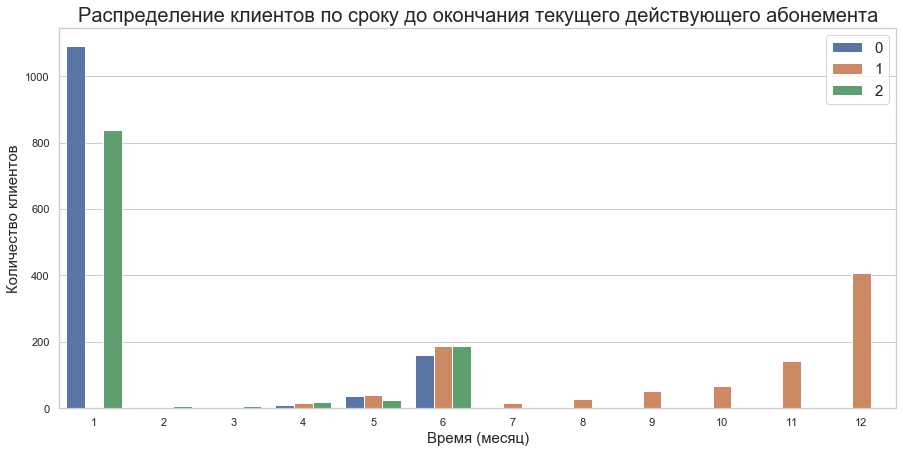

In [36]:
sns.set(style='whitegrid', rc={'figure.figsize':(15,7)})
ax = sns.countplot(x='Month_to_end', hue="claster_alternative", data=data_clasters_alternative)
ax.set_title('Распределение клиентов по сроку до окончания текущего действующего абонемента', fontsize = 20)
ax.set_xlabel('Время (месяц)', fontsize = 15)
ax.set_ylabel('Количество клиентов', fontsize = 15)
ax.legend(fontsize = 15) 

Построим график распределения для 'Lifetime'

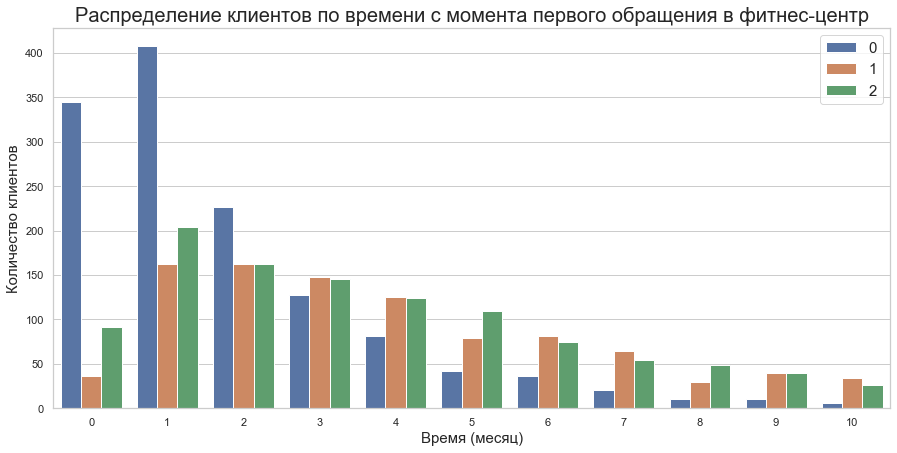

In [37]:
sns.set(style='whitegrid', rc={'figure.figsize':(15,7)})
ax = sns.countplot(x='Lifetime', hue="claster_alternative", data=data_clasters_alternative)
ax.set_title('Распределение клиентов по времени с момента первого обращения в фитнес-центр', fontsize = 20)
ax.set_xlabel('Время (месяц)', fontsize = 15)
ax.set_ylabel('Количество клиентов', fontsize = 15)
ax.legend(fontsize = 15) 

Построим график распределения для 'Contract_period'

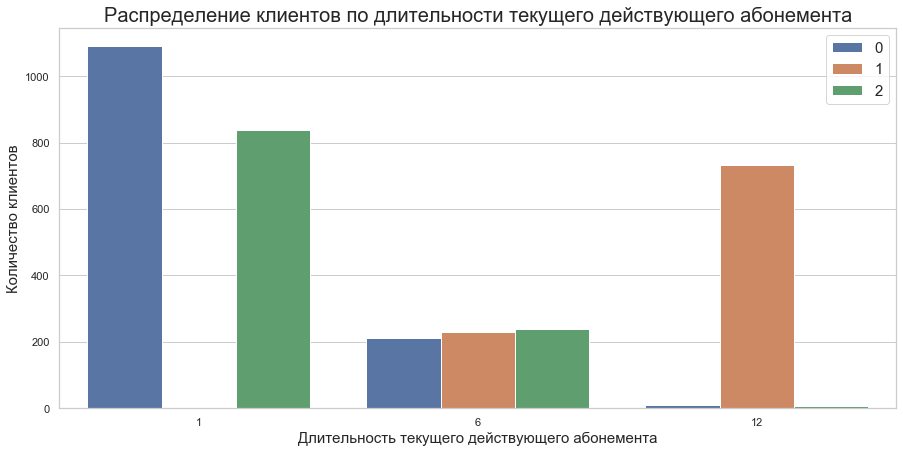

In [38]:
sns.set(style='whitegrid', rc={'figure.figsize':(15,7)})
ax = sns.countplot(x='Contract_period', hue="claster_alternative", data=data_clasters_alternative)
ax.set_title('Распределение клиентов по длительности текущего действующего абонемента', fontsize = 20)
ax.set_xlabel('Длительность текущего действующего абонемента', fontsize = 15)
ax.set_ylabel('Количество клиентов', fontsize = 15)
ax.legend(fontsize = 15) 

Построим распределение для 'Visits_total'

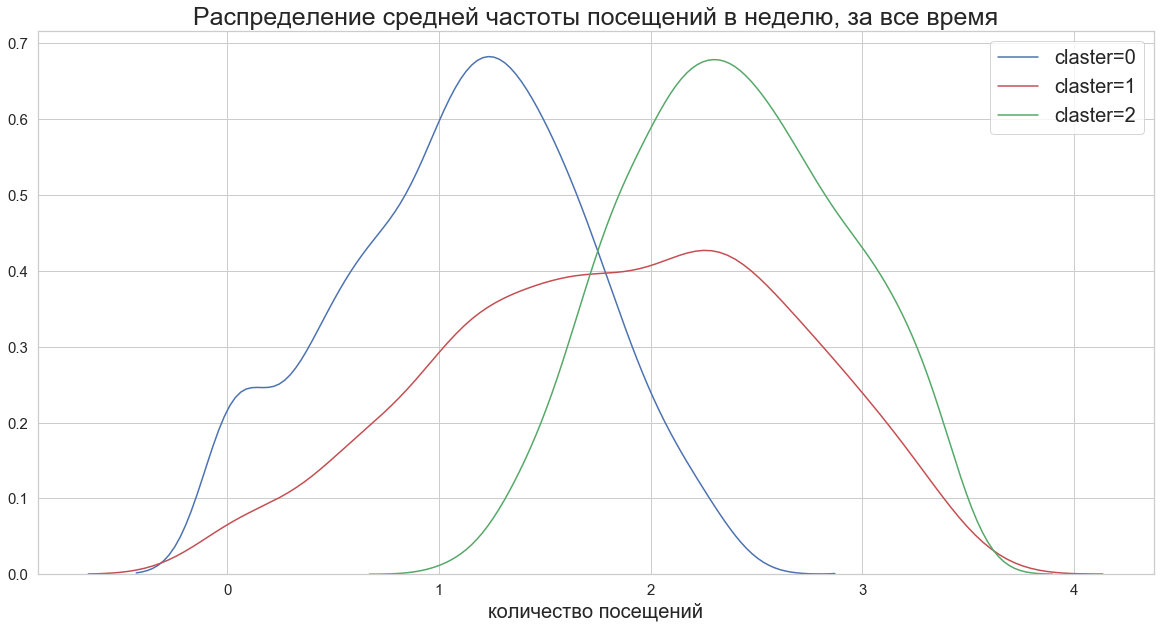

In [39]:
sns.set(style='whitegrid', rc={'figure.figsize':(20,10)})
ax = sns.distplot(data_clasters_alternative.query(' claster_alternative==0 ')['Visits_total'],
                 hist=False, color="b", label="claster=0")
ax = sns.distplot(data_clasters_alternative.query(' claster_alternative==1 ')['Visits_total'],
                 hist=False, color="r", label="claster=1")
ax = sns.distplot(data_clasters_alternative.query(' claster_alternative==2 ')['Visits_total'],
                 hist=False, color="g", label="claster=2")

ax.set_title('Распределение средней частоты посещений в неделю, за все время', fontsize = 25)
ax.set_xlabel('количество посещений', fontsize = 20)
ax.set_ylabel('')

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.legend(fontsize = 20)   

Построим распределение для 'Visits_last_mounth'

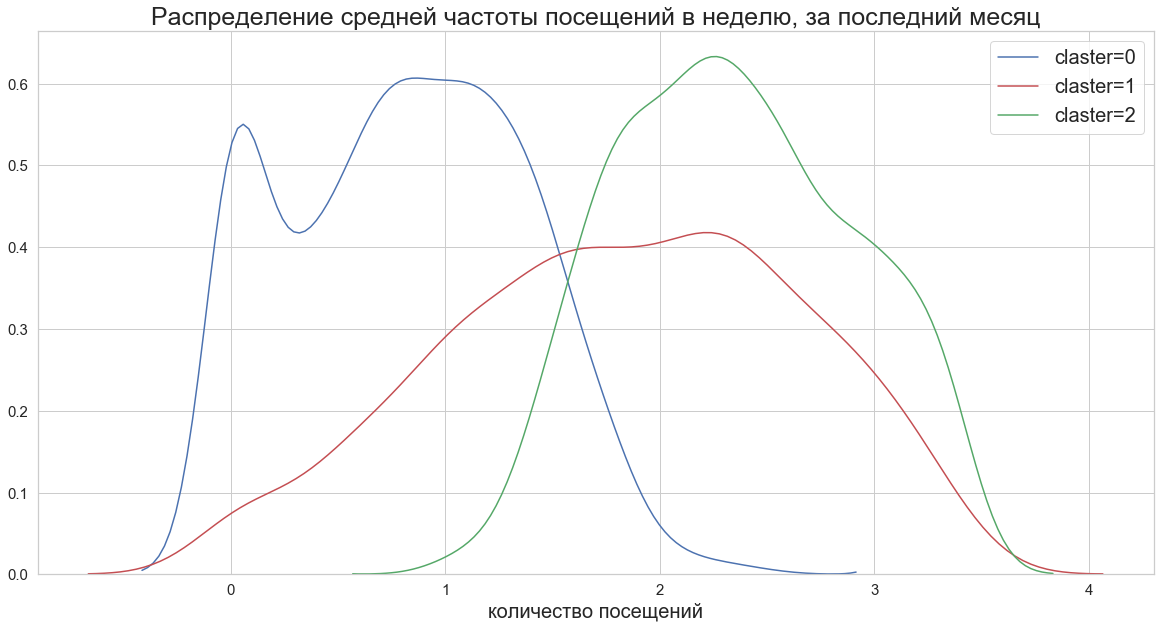

In [40]:
sns.set(style='whitegrid', rc={'figure.figsize':(20,10)})
ax = sns.distplot(data_clasters_alternative.query(' claster_alternative==0 ')['Visits_last_mounth'],
                 hist=False, color="b", label="claster=0")
ax = sns.distplot(data_clasters_alternative.query(' claster_alternative==1 ')['Visits_last_mounth'],
                 hist=False, color="r", label="claster=1")
ax = sns.distplot(data_clasters_alternative.query(' claster_alternative==2 ')['Visits_last_mounth'],
                 hist=False, color="g", label="claster=2")

ax.set_title('Распределение средней частоты посещений в неделю, за последний месяц', fontsize = 25)
ax.set_xlabel('количество посещений', fontsize = 20)
ax.set_ylabel('')

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.legend(fontsize = 20) 

**ВЫВОД:**
Графики подтверждают ранее сделанные выводы на основе средних значений показателей.

Характеристика "надежного" клиента: 
- клиенты партнеров клуба (78%)
- они часто пришли по приглашению друзей
- посещает групповые тренировки
- чаще в неделю ходит заниматься
- преобретает длительный абонемент

Характеристика "НЕнадежного" клиента:
- преобретает абонемент на короткое время (видимо неуверен в том что будет ходить в клуб долго)
- реже ходит на занятия, перед тем как бросить ходить частота занятий еще уменьшается. (видимо недостаточная мотивация)
- бросает ходить в клуб при приближении окончания абонимента.
- скорре всего занимается один без друга
- не посещает групповые тренировки
- средний возраст 27 лет.(в среднем моложе чем "надежные" клиенты)

# 5. Выводы и  базовые рекомендации по работе с клиентами

Были проанализированны данные, в результате получены инструменты (модель машинного обучения,  разделение по группам) позволяющие с достаточно хорошей веротяностью определить "надежных" и "ненадежных" (попадающих в отток) клиентов. Проанализированны зависимости характеристик от поведения клиента (надежный или ненадежный). Определены значимые и не значимые с этой точки зрения характеристики. 

**Рекомендации для стратегии взаимодействия с пользователями и их удержания:**

- усилить работу с партнерами клуба (например - найти новых партнеров, усилить взаимоействие со старыми партнерами), т.к. данные клиенты партнеров достаточно надежны.
- усилить акции (типа - преведи друга и подобные), т.к. клиенты пришедшие по акции более надежны. (с другом заниматься веселее :))
- усилить работу над групповыми занятиями (увеличить разнообразие и количество) т.к. эта характеристика положительно влияет на удержание клиента.
- не дожидаясь окончания срока действия абонемента, заинтересовывать клиента бонусами на заключение нового абонемента.
- может быть рассмотреть вопрос о популеризации длительных абонементов среди клиентов (например снижение цены)